# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

In [1]:
import requests
import bs4
from bs4 import BeautifulSoup
from __future__ import division, print_function

import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import pandas as pd
import numpy as np

from IPython.core.display import HTML, Image

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- Make sure these functions are robust and can handle cases where the data/field may not be available.
- Test the functions on the results above
- Include any other features you may want to use later (e.g. summary, #of reviews...)

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Indeed.com only has salary information for an estimated 20% of job postings. You may want to add other cities to the list below to gather more data. 
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [2]:
results = pd.read_csv('/Users/HudsonCavanagh/Documents/indeed-scraped-job-postings.csv')
results = pd.DataFrame(results)

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

Lastly, we need to clean up salary data. 
1. Some of the salaries are not yearly but hourly, these will be useful to us for now 2. The salaries are given as text and usually with ranges.

#### Filter out the salaries that are not yearly (filter those that refer to hour)

In [3]:
import numpy as np
            
# results['annual_salary'] = results['salary']

# results_nan = results.replace({None:np.NaN})
# results = pd.DataFrame(results_nan)
# results = results.drop_duplicates(inplace=1)
results.head(10)
            

,city,company,salary,summary,title,parsed_salary
0,San+Francisco,MarkMonitor,"$180,000 a year","Data skills (SQL, Hive, Pig). Applying machine...",Data Scientist,180000
1,San+Francisco,Workbridge Associates,"$130,000 - $180,000 a year",3+ years of industry experience in a data scie...,Senior Data Scientist,155000
2,San+Francisco,Mines.io,"$80,000 - $120,000 a year",We are looking for a data scientist/developer ...,Full-Stack Data Scientist,100000
3,San+Francisco,Workbridge Associates,"$150,000 - $180,000 a year",In this position you will share programming an...,Data Scientist,165000
4,San+Francisco,Smith Hanley Associates,"$140,000 a year","This person will recruit, build and lead a tea...",Data Scientist,140000
5,San+Francisco,HSF Consulting,"$300,000 a year",Teams included Data Services(including data en...,VP of Data Services,300000
6,San+Francisco,All-In Analytics,"$100,000 - $150,000 a year",Fraud Data Scientist. Seeking someone with ski...,Fraud Data Scientist,125000
7,San+Francisco,Brilent,"$130,000 a year","Perform large-scale data analysis, find intere...",Senior Data Scientist,130000
8,San+Francisco,HSF Consulting,"$160,000 a year",More data- they simply have more data than the...,Senior Data Scientist,160000
9,San+Francisco,All-In Analytics,"$100,000 - $150,000 a year",Fraud Data Scientist. Seeking someone with ski...,Fraud Data Scientist,125000


In [4]:
def salary_clean(string):
    if type(string) == float:
        return np.NaN
    elif string == np.NaN:
        return np.NaN
    else:
        try:
            return((string.split("<nobr>")[1]).split("</nobr>")[0])
        except (TypeError, IndexError): 
            return np.NaN



In [5]:
# print(results['salary'].isnull().value_counts()) #only 62 salaries in here it appears


#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [6]:
import re
import string 

def salarizer(salary):  
    '''remove all non-numeric characters from salary strings for non-null vals '''
    if pd.isnull(salary) == False:
        salary = salary.translate(None, "$|anmonthhurye,dwk ")
        return(salary) 
    else:
        return np.NaN

    


def salary_average(salary): 
    '''if a salary range, take the average, otherwise return the number'''
    float_sal_list = []
    try:
        salary_str = str(salary)
        sal_list = str.split(salary_str, "-")
        for item in sal_list:
            try:
                float_sal_list.append(float(item))
            except ValueError:
                return salary
        if len(float_sal_list) > 1:
            avg_sal = sum(float_sal_list)/float(len(float_sal_list))
            return(avg_sal)
        else:
            return float(salary)
    except IndexError:
        return np.NaN
    

In [7]:
results['hourly_salary'] = results['parsed_salary'].apply(lambda x: x if float(x) < 200 else np.nan)
results['monthly_salary'] = results['parsed_salary'].apply(lambda x: x if float(x) < 10000 else np.nan)
results['annual_salary'] = results['parsed_salary'].apply(lambda x: x if float(x) > 10000 else np.nan)



# #categorize hourly, monthly, salaries ---- this is far and away the most time-intensive part of the script
###REWROTE THIS FUNCTION BELOW ABOVE FOR PERFORMANCE REASONS

# results['monthly_salary'] = np.NaN
# results['annual_salary'] = np.NaN

# for where, number in enumerate(results['salary']):
#     if number < 200: #max of hourly is less
#         results['hourly_salary'][where] = number
#     elif number <= 10000: #max of monthly is less than this 
#         results['monthly_salary'][where] = number
#     else:
#         results['annual_salary'][where] = number


### Save your results as a CSV

In [8]:
#remove duplicates! Addition of Oakland, Berkeley, SF etc... will lead to dupes



In [9]:
import pandas as pd
import numpy as np


indeeder = results
indeeder.head()

,city,company,salary,summary,title,parsed_salary,hourly_salary,monthly_salary,annual_salary
0,San+Francisco,MarkMonitor,"$180,000 a year","Data skills (SQL, Hive, Pig). Applying machine...",Data Scientist,180000,NaN,NaN,180000
1,San+Francisco,Workbridge Associates,"$130,000 - $180,000 a year",3+ years of industry experience in a data scie...,Senior Data Scientist,155000,NaN,NaN,155000
2,San+Francisco,Mines.io,"$80,000 - $120,000 a year",We are looking for a data scientist/developer ...,Full-Stack Data Scientist,100000,NaN,NaN,100000
3,San+Francisco,Workbridge Associates,"$150,000 - $180,000 a year",In this position you will share programming an...,Data Scientist,165000,NaN,NaN,165000
4,San+Francisco,Smith Hanley Associates,"$140,000 a year","This person will recruit, build and lead a tea...",Data Scientist,140000,NaN,NaN,140000


In [10]:
indeeder.describe()

,parsed_salary,hourly_salary,monthly_salary,annual_salary
count,4789.000000,0,2352.000000,2437.00000
mean,66183.785550,NaN,5762.720026,124497.42778
std,64348.141986,NaN,2140.181881,34748.64662
min,2333.000000,NaN,2333.000000,35000.00000
25%,5950.000000,NaN,3210.000000,85000.00000
50%,74550.000000,NaN,5950.000000,130000.00000
75%,130000.000000,NaN,8541.500000,150000.00000
max,300000.000000,NaN,8541.500000,300000.00000


### Beginning Analysis Phase of Project

In [11]:
# annual_avg_sal = np.mean(indeed['annual_salary']) #not working, typeerror but can't figure it out

def meaner(series):
    '''finds the mean amidst nans'''
    mean_list = []
    for example in series:
        if example != np.NaN:
            try:
                mean_list.append(float(example))
            except (TypeError, ValueError):
                continue
        else:
            continue
    return(np.nanmean(mean_list))

In [12]:
avg_pay = meaner(indeeder['salary'])

avg_annual_salary = float(meaner(indeeder['annual_salary']))

print("all data:", avg_pay,"annual:", avg_annual_salary)
#all data: 17248.0764706 annual: 107525.268987
#conclusion is: only use annual pay salaries, or avg_annual_salary

all data: nan annual: 124497.42778


/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [13]:
# indeeder['above_average_salary'] = indeeder['annual_salary'].apply(lambda x: 1 if x > avg_annual_salary else continue)
# indeeder['above_average_salary'] = indeeder['annual_salary'].apply(lambda x: 0 if x < avg_annual_salary else continue)

def checker(value):
    avg_annual_salary = float(meaner(indeeder['annual_salary']))
    try:
        if value > avg_annual_salary:
            return 1
        elif value < avg_annual_salary:
            return 0
    except ValueError:
        return 'error'

indeeder['above_average_salary'] = indeeder['annual_salary'].to_frame().applymap(checker)

In [14]:
indeeder['above_average_salary'].mean()

0.6327451784981535

In [15]:
# skill_list = ['python', 'r', 'learning', 'SQL', 'visualiz', 'mining', 'mung', 'clean', 'scikit-learn']
# big_list = ['big', 'advanced', 'volume', 'hadoop', 'spark', 'engineer', 'large']
senior_list = ['senior', 'sr', 'sr.', 'lead', 'principle', 'chief', 'specialist']

#modified 7/9 (post-presentation) to update skill-list methodology into tiered skills
# 'finance', 'financial' -- dropped from skill_high val
skill_highval =['big data', 'hadoop', 'spark', 'hive', 'engineer', 'architect', 'finance', 'financial','learning', 'scikit', 'scikit-learn', 'pipeline', 'julia', 'hive','scala','tensorflow'] 
skill_midval = ['python', 'r', 'sql', 'matlab', 'sas', 'visualiz', 'java']
skill_lowval = ['spreadsheet', 'excel', 'mining', 'analyst', 'clean', 'mung', 'analysis', 'query', 'metric', 'analytic', 'intelligence', 'business']


indeeder['highval_count'] = 0
indeeder['midval_count'] = 0
indeeder['lowval_count'] = 0

# indeeder['skill_count'] = 0  
indeeder['senior_count'] = 0 
# indeeder['big_count'] = 0 
indeeder['constant'] = 1
indeeder = indeeder.reset_index()
indeeder['description'] = indeeder['summary']
        
#make a list combining description and title?? then run each word from that list through high val skills lists
    
for z in range(len(indeeder['description'])):
    try:
        for h in str(indeeder['description'][z]).lower().split():  
            if any(h in s for s in skill_highval):
                indeeder.ix[z,'highval_count'] += 1
        for u in str(indeeder['description'][z]).lower().split():  
            if any(u in k for k in senior_list):
                indeeder.ix[z,'senior_count'] += 1
        for d in str(indeeder['description'][z]).lower().split():
            if any(d in q for q in skill_midval):
                indeeder.ix[z,'midval_count'] += 1
        for o in str(indeeder['description'][z]).lower().split():
            if any(o in n for n in skill_lowval):
                indeeder.ix[z,'lowval_count'] += 1
    except (ValueError, AttributeError):
        continue
        
for y in range(len(indeeder['title'])):
    try:
        for h1 in str(indeeder['title'][y]).lower().split():  
            if any(h1 in s1 for s1 in skill_highval):
                indeeder.ix[y,'highval_count'] += 1
        for u1 in str(indeeder['title'][y]).lower().split():  
            if any(u1 in k1 for k1 in senior_list):
                indeeder.ix[y,'senior_count'] += 1
        for d1 in str(indeeder['title'][y]).lower().split():
            if any(d1 in q1 for q1 in skill_midval):
                indeeder.ix[y,'midval_count'] += 1
        for o1 in str(indeeder['title'][y]).lower().split():
            if any(o1 in n1 for n1 in skill_lowval):
                indeeder.ix[y,'lowval_count'] += 1
    except (ValueError, AttributeError):
        continue    
    
    
    
    
# for z in range(len(indeeder['description'])):
#     try:
#         for h in str(indeeder['description'][z]).split():  
#             if any(h in s for s in skill_list):
#                 indeeder.ix[z,'skill_count'] += 1
#         for u in indeeder['description'][z].split():  
#             if any(u in k for k in senior_list):
#                 indeeder.ix[z,'senior_count'] += 1
#         for d in indeeder['description'][z].split():
#             if any(d in q for q in big_list):
#                 indeeder.ix[z,'big_count'] += 1
#     except (ValueError, AttributeError):
#         continue
            
indeeder.head(30)

#looks like this starts dropping values around 15th row, also rows 29-39

,index,city,company,salary,summary,title,parsed_salary,hourly_salary,monthly_salary,annual_salary,above_average_salary,highval_count,midval_count,lowval_count,senior_count,constant,description
0,0,San+Francisco,MarkMonitor,"$180,000 a year","Data skills (SQL, Hive, Pig). Applying machine...",Data Scientist,180000,NaN,NaN,180000,1,4,1,1,1,1,"Data skills (SQL, Hive, Pig). Applying machine..."
1,1,San+Francisco,Workbridge Associates,"$130,000 - $180,000 a year",3+ years of industry experience in a data scie...,Senior Data Scientist,155000,NaN,NaN,155000,1,8,1,3,5,1,3+ years of industry experience in a data scie...
2,2,San+Francisco,Mines.io,"$80,000 - $120,000 a year",We are looking for a data scientist/developer ...,Full-Stack Data Scientist,100000,NaN,NaN,100000,0,4,3,2,2,1,We are looking for a data scientist/developer ...
3,3,San+Francisco,Workbridge Associates,"$150,000 - $180,000 a year",In this position you will share programming an...,Data Scientist,165000,NaN,NaN,165000,1,4,2,3,3,1,In this position you will share programming an...
4,4,San+Francisco,Smith Hanley Associates,"$140,000 a year","This person will recruit, build and lead a tea...",Data Scientist,140000,NaN,NaN,140000,1,8,3,5,6,1,"This person will recruit, build and lead a tea..."
5,5,San+Francisco,HSF Consulting,"$300,000 a year",Teams included Data Services(including data en...,VP of Data Services,300000,NaN,NaN,300000,1,9,1,0,1,1,Teams included Data Services(including data en...
6,6,San+Francisco,All-In Analytics,"$100,000 - $150,000 a year",Fraud Data Scientist. Seeking someone with ski...,Fraud Data Scientist,125000,NaN,NaN,125000,1,3,0,1,0,1,Fraud Data Scientist. Seeking someone with ski...
7,7,San+Francisco,Brilent,"$130,000 a year","Perform large-scale data analysis, find intere...",Senior Data Scientist,130000,NaN,NaN,130000,1,4,0,0,1,1,"Perform large-scale data analysis, find intere..."
8,8,San+Francisco,HSF Consulting,"$160,000 a year",More data- they simply have more data than the...,Senior Data Scientist,160000,NaN,NaN,160000,1,4,0,0,1,1,More data- they simply have more data than the...
9,9,San+Francisco,All-In Analytics,"$100,000 - $150,000 a year",Fraud Data Scientist. Seeking someone with ski...,Fraud Data Scientist,125000,NaN,NaN,125000,1,3,0,1,0,1,Fraud Data Scientist. Seeking someone with ski...


In [16]:
#duplicating above with binary

# indeeder['skill_binary'] = indeeder['skill_count'].apply(lambda x: 1 if x > 0 else 0)
indeeder['senior_binary'] = indeeder['senior_count'].apply(lambda x: 1 if x > 0 else 0)
# indeeder['big_binary'] = indeeder['big_count'].apply(lambda x: 1 if x > 0 else 0)

indeeder['highval_binary'] = indeeder['highval_count'].apply(lambda x: 1 if x > 0 else 0)
indeeder['midval_binary'] = indeeder['midval_count'].apply(lambda x: 1 if x > 0 else 0)
indeeder['lowval_binary'] = indeeder['lowval_count'].apply(lambda x: 1 if x > 0 else 0)


In [17]:
# before creating subsample with valid y values, checking shape/size


Baseline accuracy in the model should be 50%, as we're going to compare each opportunity to the mean value found in the dataset, meaning there are only two options: higher or lower. If we cannot create a model that outperforms a coinflip, we have failed miserably. 

In [18]:
import statsmodels.api as sm
import pandas as pd
import pylab as pl
import numpy as np
import patsy

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score



vals = [0,1]
indeeder_subsamp = indeeder.loc[indeeder['above_average_salary'].isin(vals)]
y = indeeder_subsamp['above_average_salary']
y.head()
#only 5 values to train on? Can't figure out where I'm losing all this data


0    1
1    1
2    0
3    1
4    1
Name: above_average_salary, dtype: float64

In [19]:
# city_list = ['SF', 'San Francisco', 'Francisco', 'New York', 'York', 'NY', 'NYC']
# indeeder['big_city'] = 0

# for gindex, gvalue in enumerate(indeeder['location']):
#     if any(str(gvalue.split()) in city_list:
#         indeeder['big_city'][gindex] = 1


# X_lame = pd.get_dummies(indeeder.loc['big_city', 'constant'])

In [20]:
#most basic logistic regression
indeeder_subsamp.describe()

,index,parsed_salary,hourly_salary,monthly_salary,annual_salary,above_average_salary,highval_count,midval_count,lowval_count,senior_count,constant,senior_binary,highval_binary,midval_binary,lowval_binary
count,2437.000000,2437.00000,0,0,2437.00000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437,2437.000000,2437.000000,2437.000000,2437.000000
mean,2564.780878,124497.42778,NaN,NaN,124497.42778,0.632745,3.078785,1.286828,1.387772,1.631514,1,0.656545,0.997538,0.648338,0.525646
std,1754.781229,34748.64662,NaN,NaN,34748.64662,0.482156,1.483194,1.354992,1.609260,2.005237,0,0.474959,0.049568,0.477587,0.499444
min,0.000000,35000.00000,NaN,NaN,35000.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000,0.000000
25%,614.000000,85000.00000,NaN,NaN,85000.00000,0.000000,2.000000,0.000000,0.000000,0.000000,1,0.000000,1.000000,0.000000,0.000000
50%,3383.000000,130000.00000,NaN,NaN,130000.00000,1.000000,3.000000,1.000000,1.000000,1.000000,1,1.000000,1.000000,1.000000,1.000000
75%,4181.000000,150000.00000,NaN,NaN,150000.00000,1.000000,3.000000,2.000000,3.000000,2.000000,1,1.000000,1.000000,1.000000,1.000000
max,4790.000000,300000.00000,NaN,NaN,300000.00000,1.000000,9.000000,4.000000,8.000000,8.000000,1,1.000000,1.000000,1.000000,1.000000


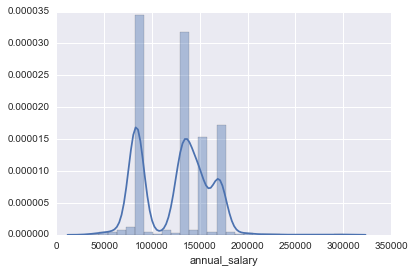

In [21]:
import seaborn as sns
%matplotlib inline

sns_plot = sns.distplot(indeeder_subsamp['annual_salary'])
# sns_plot.savefig("annual_salary_hist.jpg")


# sns_transsize_volsold = sns.jointplot(q1_X['avg_trans_size'],q1_X['avg_vol_sold_L'])
# sns_transsize_volsold.savefig("sns_transsize_volsold.png")


In [22]:
features = indeeder_subsamp.loc[:,['senior_count', 'highval_count', 'midval_count','lowval_count', 'constant']]#will add 'big_city' later
binary_features = indeeder_subsamp.loc[:,['senior_binary', 'highval_binary', 'midval_binary', 'lowval_count', 'constant']]

indeeder['highval_count'] = 0
indeeder['midval_count'] = 0
indeeder['lowval_count']

# .loc[['a', 'b', 'd'], :]

0       1
1       3
2       2
3       3
4       5
5       0
6       1
7       0
8       0
9       1
10      1
11      2
12      0
13      0
14      3
15      5
16      0
17      2
18      4
19      1
20      1
21      1
22      2
23      1
24      1
25      4
26      2
27      4
28      1
29      1
       ..
4761    1
4762    3
4763    0
4764    3
4765    0
4766    1
4767    3
4768    0
4769    1
4770    3
4771    0
4772    1
4773    1
4774    3
4775    0
4776    1
4777    3
4778    0
4779    3
4780    0
4781    3
4782    0
4783    1
4784    3
4785    0
4786    1
4787    3
4788    0
4789    3
4790    0
Name: lowval_count, dtype: int64

In [23]:
X = features
X1 = binary_features
X.head()

,senior_count,highval_count,midval_count,lowval_count,constant
0,1,4,1,1,1
1,5,8,1,3,1
2,2,4,3,2,1
3,3,4,2,3,1
4,6,8,3,5,1


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.33, random_state=50)


In [25]:
#regression using counts

lr_basic = LogisticRegression(solver='liblinear') #can i take away penalty? make sure this is statsmodels
lr_basic_model = lr_basic.fit(X_train, y_train)
lr_basic_ypred = lr_basic_model.predict(X_test)

lr_basic_cm = confusion_matrix(y_test, lr_basic_ypred, labels=lr_basic.classes_)
lr_basic_cm_df = pd.DataFrame(lr_basic_cm, columns=lr_basic.classes_, index=lr_basic.classes_) #lr_l1_SF is instance of model
print(lr_basic_cm_df)

     0    1
0  259   24
1   15  507


In [26]:
% matplotlib inline
print(classification_report(y_test, lr_basic_ypred, labels=lr_basic.classes_))

             precision    recall  f1-score   support

        0.0       0.95      0.92      0.93       283
        1.0       0.95      0.97      0.96       522

avg / total       0.95      0.95      0.95       805



In [27]:
cross_val_score(lr_basic, X, y, cv=10).mean()

0.95580600060303422

In [28]:
#regression using binary

lr_bin = LogisticRegression(solver='liblinear') #can i take away penalty? make sure this is statsmodels
lr_bin_model = lr_bin.fit(X1_train, y1_train)
lr_bin_ypred = lr_bin_model.predict(X1_test)

lr_bin_cm = confusion_matrix(y1_test, lr_bin_ypred, labels=lr_bin.classes_)
lr_bin_cm_df = pd.DataFrame(lr_bin_cm, columns=lr_bin.classes_, index=lr_bin.classes_) #lr_l1_SF is instance of model
print(lr_bin_cm_df)

     0    1
0   16  267
1  137  385


In [29]:
print(classification_report(y1_test, lr_bin_ypred, labels=lr_bin.classes_))

             precision    recall  f1-score   support

        0.0       0.10      0.06      0.07       283
        1.0       0.59      0.74      0.66       522

avg / total       0.42      0.50      0.45       805



In [30]:
cross_val_score(lr_bin, X1, y, cv=10).mean()

0.36448507352748838

In [31]:
# generic curve plotting function
import matplotlib.pyplot as plt
from sklearn import metrics
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = metrics.auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (has_cancer)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for salary > ~100,000', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = metrics.roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')

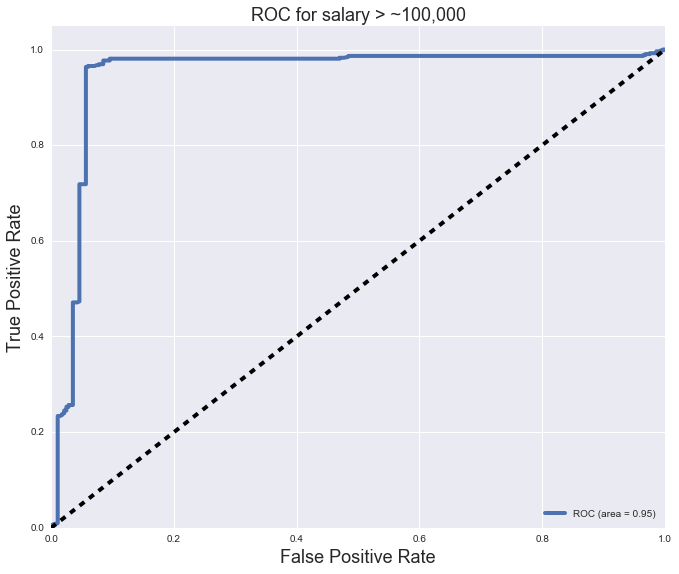

In [32]:

y_score_basic = lr_basic.decision_function(X_test)
plot_roc(y_test, y_score_basic)


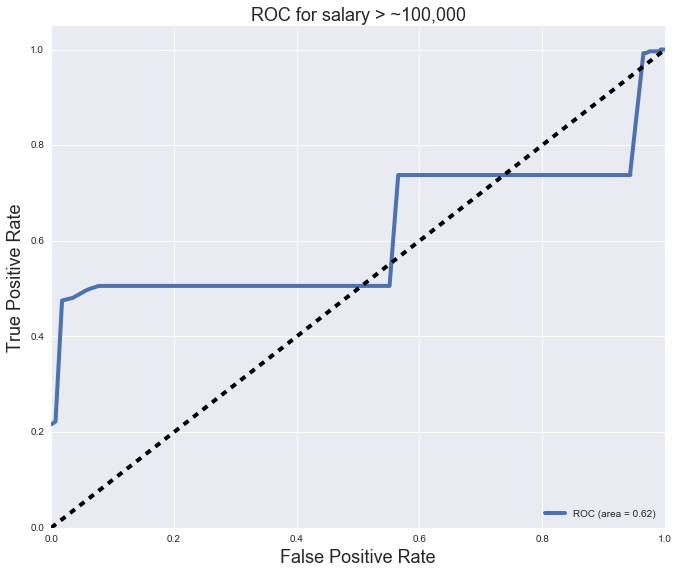

In [33]:
y_score_bin = lr_bin.decision_function(X1_test)
plot_roc(y1_test, y_score_bin)

In [34]:
print(classification_report(y_test, lr_basic_ypred, labels=lr_basic.classes_))

             precision    recall  f1-score   support

        0.0       0.95      0.92      0.93       283
        1.0       0.95      0.97      0.96       522

avg / total       0.95      0.95      0.95       805



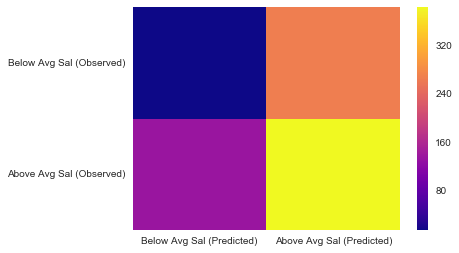

In [35]:
import seaborn as sns

sns.heatmap(lr_bin_cm_df, vmin=None, vmax=None, cmap='plasma', center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, ax=None, xticklabels=("Below Avg Sal (Predicted)","Above Avg Sal (Predicted)"), yticklabels=("Below Avg Sal (Observed)","Above Avg Sal (Observed)"), mask=None)

In [36]:
lr_bin_model.coef_

array([[ 1.96568361,  0.23383012,  0.40361068, -0.46239142, -0.25609481]])

In [37]:
lr_basic_model.coef_
# ['senior_count', 'highval_count', 'midval_count','lowval_count', 'constant']

array([[ 4.76960742,  0.44250455, -2.5588592 , -3.29871347,  0.11653423]])

In [38]:
#Lasso
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear') #can i take away penalty? make sure this is statsmodels
lr_l1_model = lr_l1.fit(X_train, y_train)
lr_l1_ypred = lr_l1_model.predict(X_test)

lr_l1_cm = confusion_matrix(y_test, lr_l1_ypred, labels=lr_l1.classes_)
lr_l1_cm_df = pd.DataFrame(lr_l1_cm, columns=lr_basic.classes_, index=lr_l1.classes_) #lr_l1_SF is instance of model
lr_l1_cm_df

,0.0,1.0
0,259,24
1,15,507


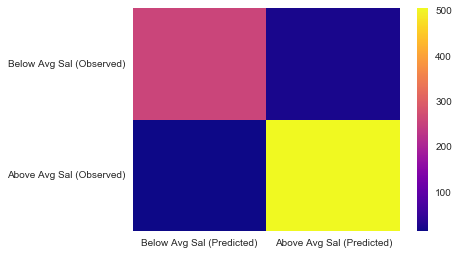

In [39]:
sns.heatmap(lr_l1_cm_df, vmin=None, vmax=None, cmap='plasma', center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, ax=None, xticklabels=("Below Avg Sal (Predicted)","Above Avg Sal (Predicted)"), yticklabels=("Below Avg Sal (Observed)","Above Avg Sal (Observed)"), mask=None)

In [40]:
print(classification_report(y_test, lr_l1_ypred, labels=lr_l1.classes_))

             precision    recall  f1-score   support

        0.0       0.95      0.92      0.93       283
        1.0       0.95      0.97      0.96       522

avg / total       0.95      0.95      0.95       805



In [41]:
cross_val_score(lr_l1, X, y, cv=10).mean()

0.95580600060303422

In [42]:
lr_l1_model.coef_

array([[ 5.10267582,  0.46024404, -2.77328128, -3.505323  ,  0.25194981]])

In [43]:
# import statsmodels as sm
# from statsmodels import stats

# VIF_X = stats.outliers_influence.variance_inflation_factor(X)
# VIF_X1 = stats.outliers_influence.variance_inflation_factor(X1)
# print(VIF_X, VIF_X1)

In [44]:
#re-run lasso using only the senior list & skill count(should still be negative)

slim_features = indeeder_subsamp.loc[:,['senior_count', 'highval_count', 'constant']]#will add 'big_city' later
slim_bin_features = indeeder_subsamp.loc[:,['senior_binary', 'highval_binary', 'constant']]
senior_count_feat = indeeder_subsamp.loc[:,['senior_binary', 'constant']]


X_slim_train, X_slim_test, y_slim_train, yslim__test = train_test_split(slim_features, y, test_size=0.33, random_state=50)
X_sbin_train, X_sbin_test, y_sbin_train, ysbin__test = train_test_split(slim_bin_features, y, test_size=0.33, random_state=50)
X_sen_train, X_sen_test, y_sen_train, y_sen__test = train_test_split(senior_count_feat, y, test_size=0.33, random_state=50)


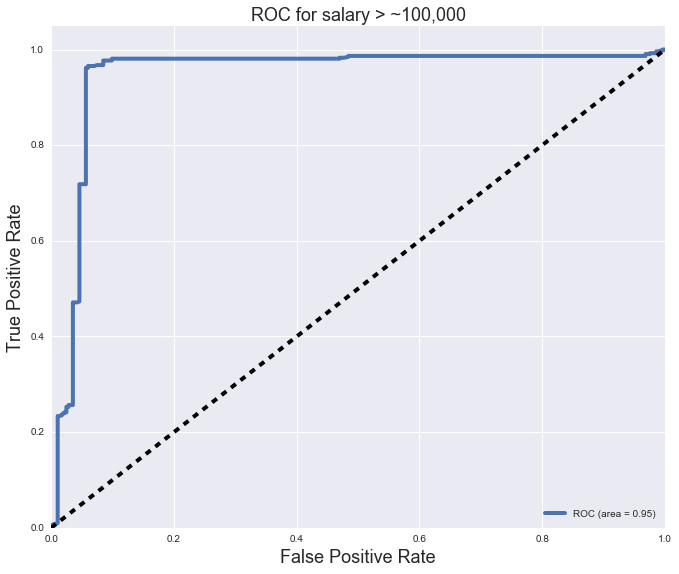

In [45]:
Y_score_l1 = lr_l1.decision_function(X_test)
plot_roc(y_test, Y_score_l1)

In [46]:
#Ridge
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear') #can i take away penalty? make sure this is statsmodels
lr_l2_model = lr_l2.fit(X_train, y_train)
lr_l2_ypred = lr_l2_model.predict(X_test)

lr_l2_cm = confusion_matrix(y_test, lr_l2_ypred, labels=lr_l2.classes_)
lr_l2_cm_df = pd.DataFrame(lr_l2_cm, columns=lr_l2.classes_, index=lr_l2.classes_) #lr_l1_SF is instance of model
lr_l2_cm_df

,0.0,1.0
0,259,24
1,15,507


In [47]:
print(classification_report(y_test, lr_l2_ypred, labels=lr_l2.classes_))

             precision    recall  f1-score   support

        0.0       0.95      0.92      0.93       283
        1.0       0.95      0.97      0.96       522

avg / total       0.95      0.95      0.95       805



In [48]:
cross_val_score(lr_l2, X, y, cv=10).mean()

0.95580600060303422

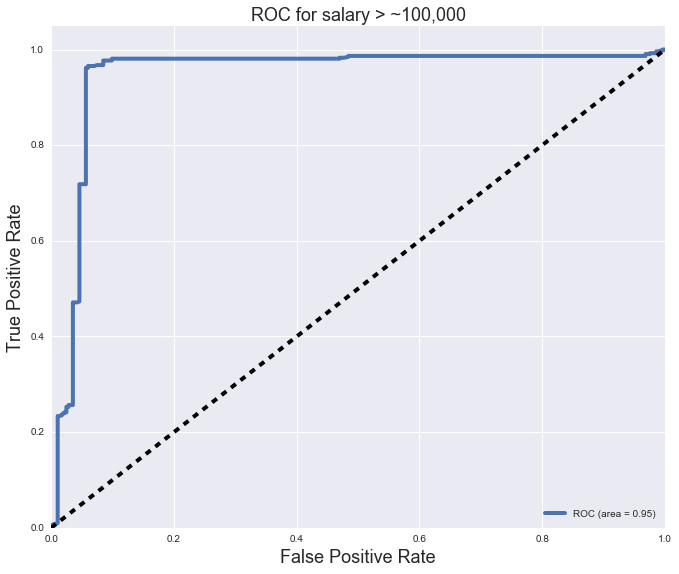

In [49]:
Y_score_l2 = lr_l1.decision_function(X_test)
plot_roc(y_test, Y_score_l2)

In [50]:
#grid search optimization
logreg = LogisticRegression(solver='liblinear')
C_vals = [0.0001, 0.001, 0.01, 0.1, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=15)
gs.fit(X, y)

GridSearchCV(cv=15, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.15, 0.25, 0.275, 0.33, 0.5, 0.66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=False)

In [51]:
gs.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [52]:
logreg = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
cv_model = logreg.fit(X_train, y_train)

In [53]:
cv_model.coef_

array([[ 4.07350805,  0.42572399, -2.01390991, -2.87936899,  0.        ]])

In [54]:
cv_pred = cv_model.predict(X_test)

In [55]:
cm3 = confusion_matrix(y_test, cv_pred, labels=logreg.classes_)
cm3 = pd.DataFrame(cm3, columns=logreg.classes_, index=logreg.classes_)

In [56]:
cm3

,0.0,1.0
0,259,24
1,12,510


In [57]:
print(classification_report(y_test, cv_pred, labels=logreg.classes_))

             precision    recall  f1-score   support

        0.0       0.96      0.92      0.94       283
        1.0       0.96      0.98      0.97       522

avg / total       0.96      0.96      0.96       805



In [58]:
cross_val_score(cv_model, X, y, cv=10).mean()


0.95662901833471703

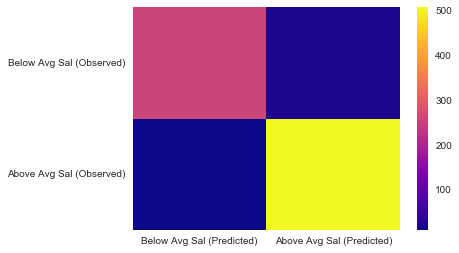

In [59]:
sns.heatmap(cm3, vmin=None, vmax=None, cmap='plasma', center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, ax=None, xticklabels=("Below Avg Sal (Predicted)","Above Avg Sal (Predicted)"), yticklabels=("Below Avg Sal (Observed)","Above Avg Sal (Observed)"), mask=None)

In [60]:
print(classification_report(y_test, cv_pred, labels=logreg.classes_))

             precision    recall  f1-score   support

        0.0       0.96      0.92      0.94       283
        1.0       0.96      0.98      0.97       522

avg / total       0.96      0.96      0.96       805



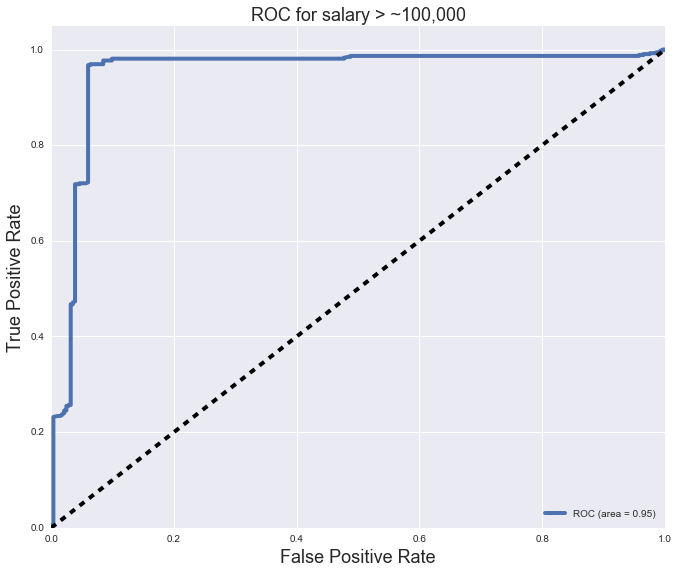

In [61]:
Y_score_gs = logreg.decision_function(X_test)
plot_roc(y_test, Y_score_gs)

In [62]:
#binary gridsearch regression

In [63]:
logreg_bin = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
cv_bin_model = logreg_bin.fit(X1_train, y1_train)
cv_bin_pred = cv_bin_model.predict(X1_test)
cm4 = confusion_matrix(y1_test, cv_bin_pred, labels=logreg_bin.classes_)
cm4 = pd.DataFrame(cm4, columns=logreg_bin.classes_, index=logreg_bin.classes_)


In [64]:
cm4

,0.0,1.0
0,16,267
1,137,385


In [65]:
print(classification_report(y1_test, cv_bin_pred, labels=logreg_bin.classes_))

             precision    recall  f1-score   support

        0.0       0.10      0.06      0.07       283
        1.0       0.59      0.74      0.66       522

avg / total       0.42      0.50      0.45       805



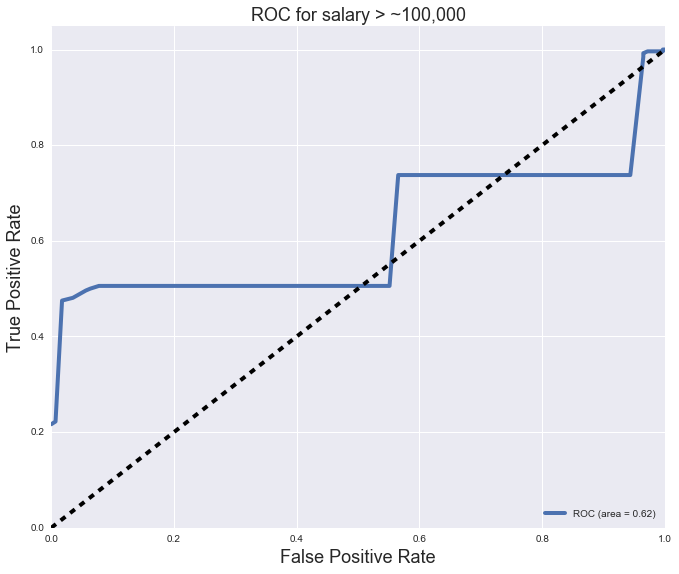

In [66]:
Y_score_bin_gs = logreg_bin.decision_function(X1_test)
plot_roc(y1_test, Y_score_bin_gs)

###Creating Visualizations



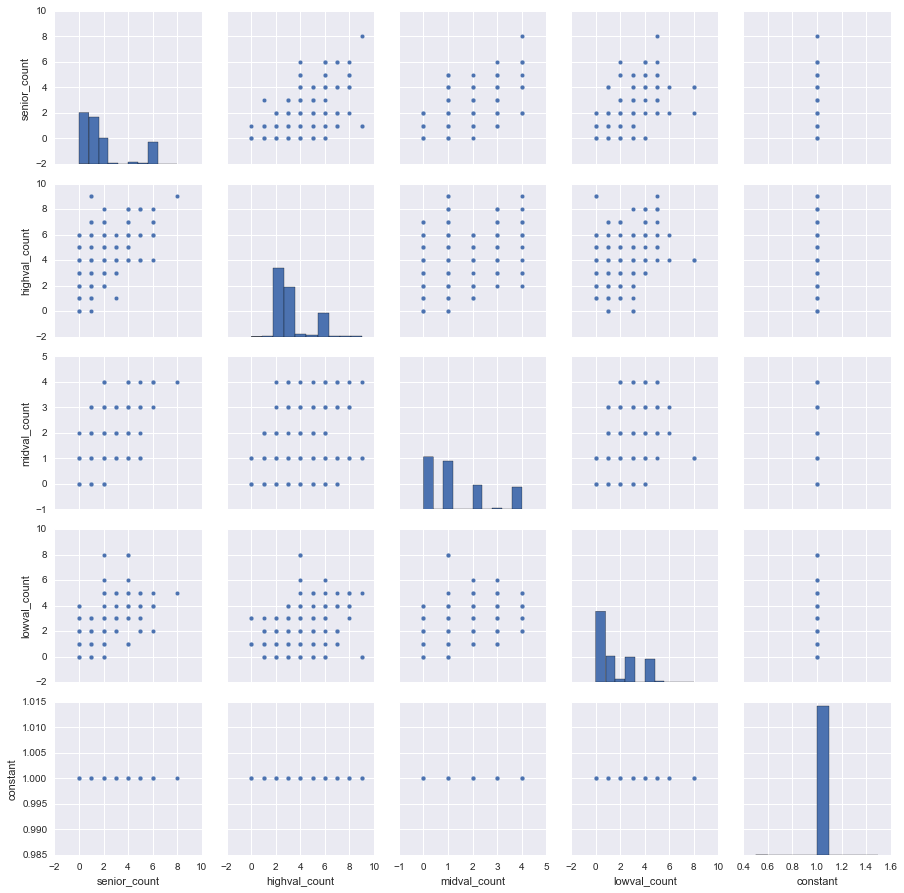

In [67]:
import seaborn as sns

pairplot_X = sns.pairplot(X)
pairplot_X.savefig("sns_pairplotX.png")

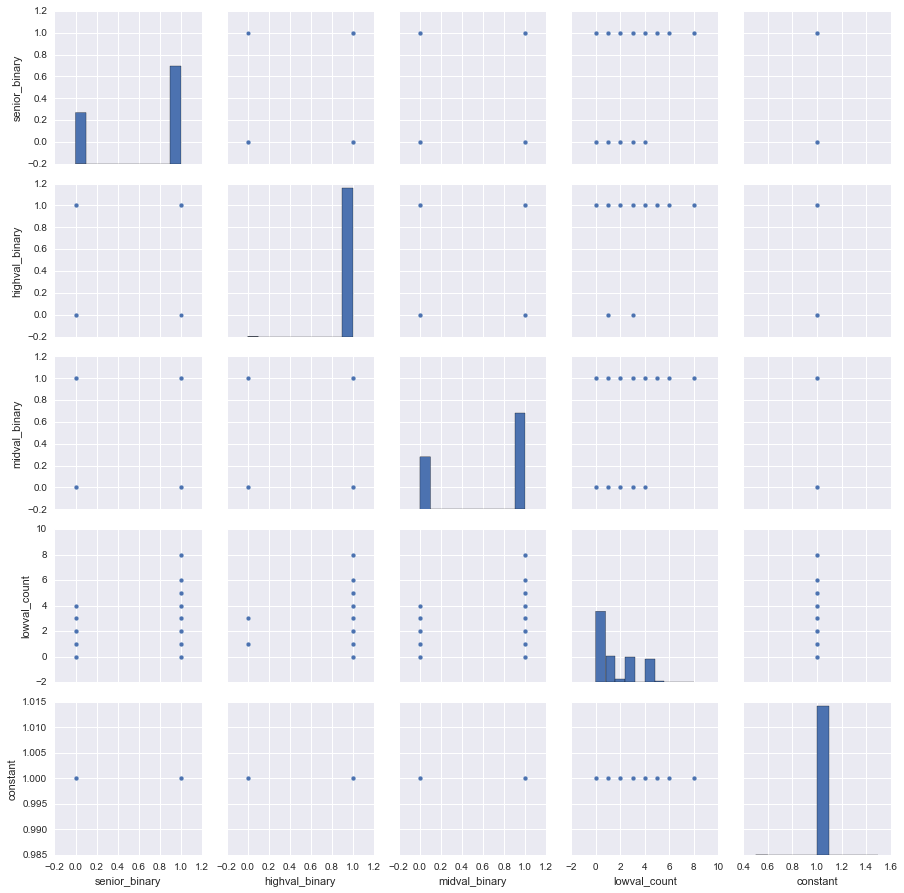

In [68]:
pairplotX1 = sns.pairplot(X1)
pairplotX1.savefig("sns_pairplotX1.png")

In [69]:
# X_slim_train, X_slim_test, y_slim_train, yslim__test 
# X_sbin_train, X_sbin_test, y_sbin_train, ysbin__test 
X_sen_train, X_sen_test, y_sen_train, y_sen__test

(      senior_binary  constant
 513               1         1
 2213              0         1
 808               1         1
 3998              1         1
 396               1         1
 26                1         1
 3629              0         1
 981               0         1
 324               1         1
 319               1         1
 713               1         1
 2026              0         1
 637               1         1
 3377              0         1
 252               1         1
 4068              1         1
 2402              0         1
 677               1         1
 4638              0         1
 359               1         1
 4735              1         1
 3991              1         1
 431               1         1
 75                1         1
 4443              1         1
 245               1         1
 2022              0         1
 760               1         1
 3985              1         1
 40                1         1
 ...             ...       ...
 840    

In [70]:
#using only senior and skills as features
logreg_slim = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
slim_model = logreg_slim.fit(X_slim_train, y_slim_train)
slim_pred = slim_model.predict(X_slim_test)
cm5 = confusion_matrix(yslim__test, slim_pred, labels=logreg_slim.classes_)
cm5 = pd.DataFrame(cm5, columns=("Below Avg Sal (Observed)","Above Avg Sal (Observed)"), index=("Below Avg Sal (Predicted)","Above Avg Sal (Predicted)"))
cm5



,Below Avg Sal (Observed),Above Avg Sal (Observed)
Below Avg Sal (Predicted),123,160
Above Avg Sal (Predicted),138,384


In [71]:
cross_val_score(slim_model, X, y, cv=10).mean()


0.95662901833471703

In [72]:
print(classification_report(y_test, slim_pred, labels=logreg_bin.classes_))

             precision    recall  f1-score   support

        0.0       0.47      0.43      0.45       283
        1.0       0.71      0.74      0.72       522

avg / total       0.62      0.63      0.63       805



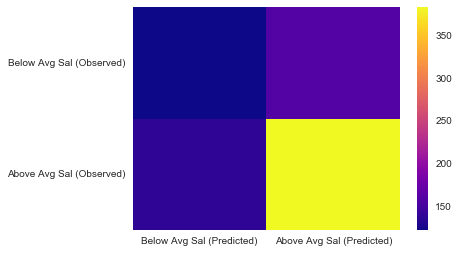

In [73]:
sns.heatmap(cm5, vmin=None, vmax=None, cmap='plasma', center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, ax=None, xticklabels=("Below Avg Sal (Predicted)","Above Avg Sal (Predicted)"), yticklabels=("Below Avg Sal (Observed)","Above Avg Sal (Observed)"), mask=None)

In [74]:
print(classification_report(yslim__test, slim_pred, labels=logreg_slim.classes_))

             precision    recall  f1-score   support

        0.0       0.47      0.43      0.45       283
        1.0       0.71      0.74      0.72       522

avg / total       0.62      0.63      0.63       805



AttributeError: 'LogisticRegression' object has no attribute 'summary'

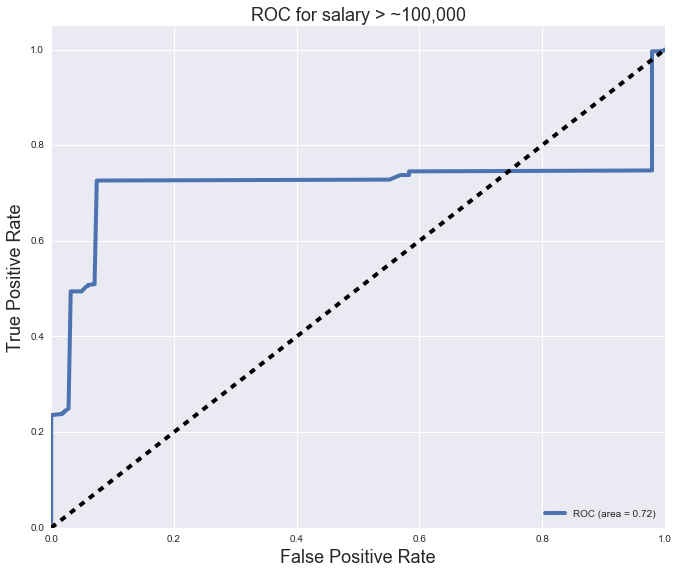

In [77]:
Y_score_slim_gs = logreg_slim.decision_function(X_slim_test)
plot_roc(yslim__test, Y_score_slim_gs)

In [78]:
#using only senior and skills as features

# X_sbin_train, X_sbin_test, y_sbin_train, ysbin__test 

logreg_sbin = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
sbin_model = logreg_sbin.fit(X_sbin_train, y_sbin_train)
sbin_pred = sbin_model.predict(X_sbin_test)
cm6 = confusion_matrix(ysbin__test, sbin_pred, labels=logreg_sbin.classes_)
cm6 = pd.DataFrame(cm6, columns=logreg_sbin.classes_, index=logreg_sbin.classes_)
cm6



,0.0,1.0
0,122,161
1,132,390


In [79]:
sbin_model.coef_

array([[ 0.84593631,  0.        ,  0.        ]])

In [80]:
print(classification_report(ysbin__test, sbin_pred, labels=logreg_sbin.classes_))

             precision    recall  f1-score   support

        0.0       0.48      0.43      0.45       283
        1.0       0.71      0.75      0.73       522

avg / total       0.63      0.64      0.63       805



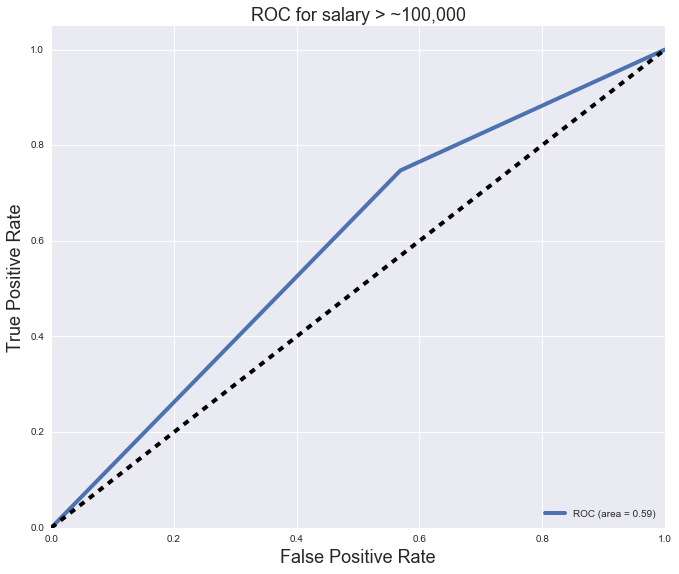

In [81]:
Y_score_sbin_gs = logreg_sbin.decision_function(X_sbin_test)
plot_roc(ysbin__test, Y_score_sbin_gs)

In [82]:
# X_sen_train, X_sen_test, y_sen_train, y_sen__test

logreg_sen = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
sen_model = logreg_sen.fit(X_sen_train, y_sen_train)
sen_pred = sen_model.predict(X_sen_test)
cm7 = confusion_matrix(y_sen__test, sen_pred, labels=logreg_sen.classes_)
cm7 = pd.DataFrame(cm7, columns=logreg_sen.classes_, index=logreg_sen.classes_)
cm7


,0.0,1.0
0,122,161
1,132,390


In [83]:
print(classification_report(y_sen__test, sen_pred, labels=logreg_sen.classes_))

             precision    recall  f1-score   support

        0.0       0.48      0.43      0.45       283
        1.0       0.71      0.75      0.73       522

avg / total       0.63      0.64      0.63       805



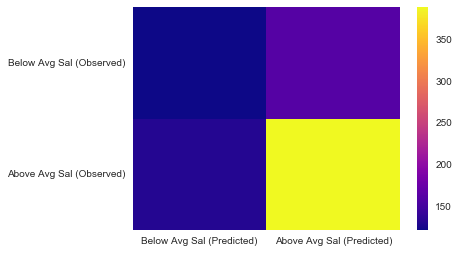

In [84]:
sns.heatmap(cm7, vmin=None, vmax=None, cmap='plasma', center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, ax=None, xticklabels=("Below Avg Sal (Predicted)","Above Avg Sal (Predicted)"), yticklabels=("Below Avg Sal (Observed)","Above Avg Sal (Observed)"), mask=None)

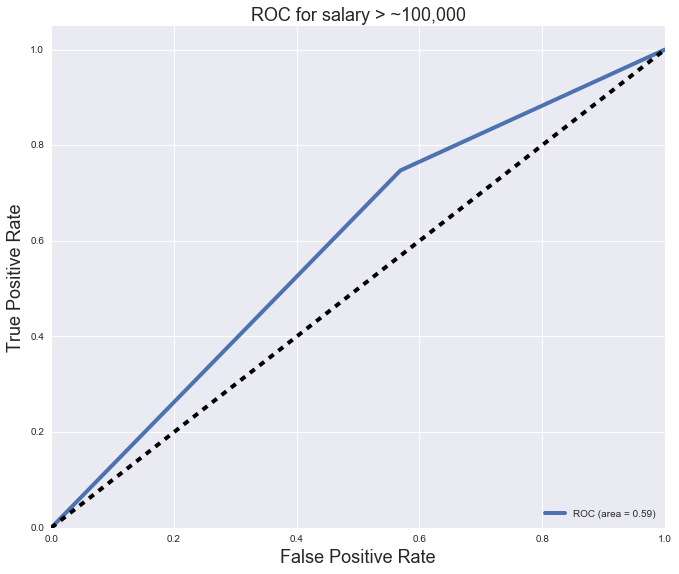

In [85]:
Y_score_sen_gs = logreg_sen.decision_function(X_sen_test)
plot_roc(y_sen__test, Y_score_sen_gs)

In [ ]:
sen_model.coef_

In [ ]:
sns.distplot(indeeder_subsamp['parsed_salary'])

In [ ]:
sns.distplot(indeeder_subsamp['annual_salary'].dropna())

Computing t-SNE embedding


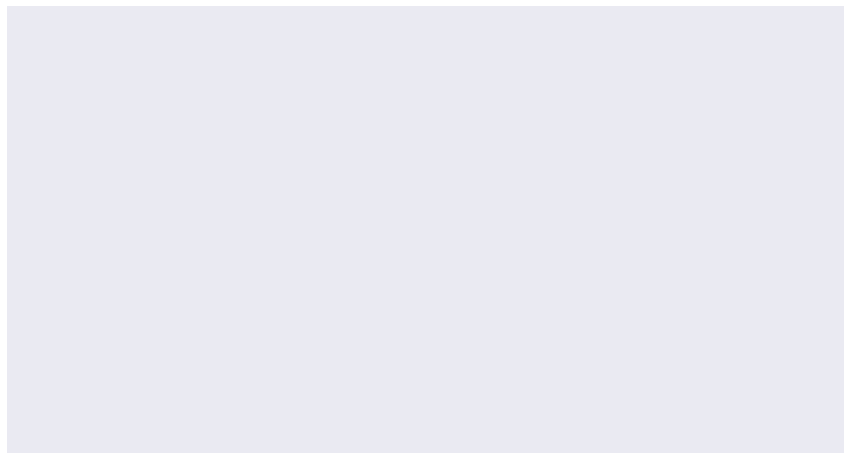

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from time import time

%matplotlib inline


def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    fig = plt.figure(figsize=(15,8))
    ax = plt.subplot(111)

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne, y)

plt.show()

In [103]:
from sklearn import tsne
from tsne import bh_sne
import numpy as np
from skimage.transform import resize

from matplotlib import pyplot as plt

def gray_to_color(img):
    if len(img.shape) == 2:
        img = np.dstack((img, img, img))
    return img

def min_resize(img, size):
    """
    Resize an image so that it is size along the minimum spatial dimension.
    """
    w, h = map(float, img.shape[:2])
    if min([w, h]) != size:
        if w <= h:
            img = resize(img, (int(round((h/w)*size)), int(size)))
        else:
            img = resize(img, (int(size), int(round((w/h)*size))))
    return img

def image_scatter(features, images, img_res, res=4000, cval=1.):
    """
    Embeds images via tsne into a scatter plot.
    Parameters
    ---------
    features: numpy array
        Features to visualize
    images: list or numpy array
        Corresponding images to features. Expects float images from (0,1).
    img_res: float or int
        Resolution to embed images at
    res: float or int
        Size of embedding image in pixels
    cval: float or numpy array
        Background color value
    Returns
    ------
    canvas: numpy array
        Image of visualization
    """
    features = np.copy(features).astype('float64')
    images = [gray_to_color(image) for image in images]
    images = [min_resize(image, img_res) for image in images]
    max_width = max([image.shape[0] for image in images])
    max_height = max([image.shape[1] for image in images])

    f2d = bh_sne(features)

    xx = f2d[:, 0]
    yy = f2d[:, 1]
    x_min, x_max = xx.min(), xx.max()
    y_min, y_max = yy.min(), yy.max()
    # Fix the ratios
    sx = (x_max-x_min)
    sy = (y_max-y_min)
    if sx > sy:
        res_x = sx/float(sy)*res
        res_y = res
    else:
        res_x = res
        res_y = sy/float(sx)*res

    canvas = np.ones((res_x+max_width, res_y+max_height, 3))*cval
    x_coords = np.linspace(x_min, x_max, res_x)
    y_coords = np.linspace(y_min, y_max, res_y)
    for x, y, image in zip(xx, yy, images):
        w, h = image.shape[:2]
        x_idx = np.argmin((x - x_coords)**2)
        y_idx = np.argmin((y - y_coords)**2)
        canvas[x_idx:x_idx+w, y_idx:y_idx+h] = image
    return canvas


image_scatter(X, 0, 0, res=4000, cval=1.)




ImportError: cannot import name tsne